In [13]:
import matplotlib.pyplot as plt
from shapely.ops import unary_union
import geopandas as gpd
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import haversine_distances

In [14]:
df = pd.read_excel(r"C:\Users\nunez\OneDrive\Escritorio\Bases\base_2012_2022_limpia.xlsx")
#MacOS
#df = pd.read_excel("/Users/santi/Desktop/Work/Bases/base_2012_2022_limpia.xlsx")

#Select 2022
df = df[df["ANIO"] == 2022]

#Geojson barrios caba
GeoJson_barrios = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/barrios/barrios.geojson"
geojson = gpd.read_file(GeoJson_barrios)

#Point geometries from lat, long columns
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy( df["Longitud"], df["Latitud"]))

#Boundary of CABA
boundary = unary_union(geojson["geometry"]).exterior

#Removing al points outside of the boundary

# perform spatial join
joined = gpd.sjoin(gdf, geojson, op='within')

# filter out points that do not intersect with the boundary
points_within_boundary = joined[joined.index_right.notnull()]
clean_df = points_within_boundary
clean_df

C:\Users\nunez\PycharmProjects\Permisos_de_obra\venv\lib\site-packages\IPython\core\interactiveshell.py:3445: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\nunez\AppData\Local\Temp\ipykernel_9896\793475506.py:21: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined = gpd.sjoin(gdf, geojson, op='within')


,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,ANIO,MES,TRIMESTRE,FECHA,DIRECCION,TIPO_OBRA,TIPO_OBRA_CUR,...,add,location,address,geometry,index_right,BARRIO,COMUNA_right,PERIMETRO,AREA,OBJETO
0,0,0.0,7,2022,1,1.0,3 ene 2022,GUARDIA VIEJA 3764,1,OBRA MAYOR,...,"GUARDIA VIEJA 3764 ALMAGRO Buenos Aires, Argen...",0.0,"GUARDIA VIEJA 3764 ALMAGRO Buenos Aires, Argen...",POINT (-58.41723 -34.60122),4,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO
2,2,2.0,9,2022,3,1.0,3 mar 2022,RAWSON 276,1,Obra Mayor,...,"RAWSON 276 ALMAGRO Buenos Aires, Argentina",2.0,"RAWSON 276 ALMAGRO Buenos Aires, Argentina",POINT (-58.42628 -34.60916),4,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO
4,4,4.0,11,2022,3,1.0,2 mar 2022,LAMBARE 847,1,OBRA MAYOR,...,"LAMBARE 847 ALMAGRO Buenos Aires, Argentina",4.0,"LAMBARE 847 ALMAGRO Buenos Aires, Argentina",POINT (-58.43047 -34.60510),4,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO
5,5,5.0,12,2022,3,1.0,4 mar 2022,HUMAHUACA 3787,1,OBRA MAYOR,...,"HUMAHUACA 3787 ALMAGRO Buenos Aires, Argentina",5.0,"HUMAHUACA 3787 ALMAGRO Buenos Aires, Argentina",POINT (-58.41762 -34.60217),4,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO
6,6,6.0,13,2022,2,1.0,1 feb 2022,SARMIENTO 4088,1,OBRA MAYOR,...,"SARMIENTO 4088 ALMAGRO Buenos Aires, Argentina",6.0,"SARMIENTO 4088 ALMAGRO Buenos Aires, Argentina",POINT (-58.42254 -34.60481),4,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2635,2635,2635.0,2329,2022,8,3.0,2022-08-24 00:00:00,AV. REGIMIENTO DE PATRICIOS 892,3,Obra Menor,...,AV. REGIMIENTO DE PATRICIOS 892 BOCA Buenos Ai...,2635.0,AV. REGIMIENTO DE PATRICIOS 892 BOCA Buenos Ai...,POINT (-58.36944 -34.63814),47,BOCA,4.0,20060.003939,5.036240e+06,BARRIO
2636,2636,2636.0,2329,2022,8,3.0,2022-08-24 00:00:00,AV. REGIMIENTO DE PATRICIOS 892,3,Obra Menor,...,AV. REGIMIENTO DE PATRICIOS 892 BOCA Buenos Ai...,2636.0,AV. REGIMIENTO DE PATRICIOS 892 BOCA Buenos Ai...,POINT (-58.36944 -34.63814),47,BOCA,4.0,20060.003939,5.036240e+06,BARRIO
2637,2637,2637.0,2330,2022,8,3.0,2022-08-30 00:00:00,AV. REGIMIENTO DE PATRICIOS 30,3,Obra Media,...,AV. REGIMIENTO DE PATRICIOS 30 BOCA Buenos Air...,2637.0,AV. REGIMIENTO DE PATRICIOS 30 BOCA Buenos Air...,POINT (-58.37045 -34.62994),47,BOCA,4.0,20060.003939,5.036240e+06,BARRIO
2638,2638,2638.0,2330,2022,8,3.0,2022-08-30 00:00:00,AV. REGIMIENTO DE PATRICIOS 30,3,Obra Media,...,AV. REGIMIENTO DE PATRICIOS 30 BOCA Buenos Air...,2638.0,AV. REGIMIENTO DE PATRICIOS 30 BOCA Buenos Air...,POINT (-58.37045 -34.62994),47,BOCA,4.0,20060.003939,5.036240e+06,BARRIO


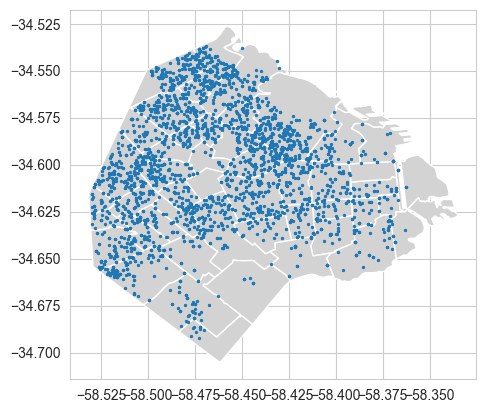

In [15]:
fig, ax = plt.subplots()
geojson["geometry"].plot(ax=ax, color='lightgrey')
points_within_boundary.plot(ax=ax, markersize=2)
plt.show()

In [16]:
clean_df = clean_df[clean_df["TIPO_OBRA"] == 3]
#clean_df = clean_df[clean_df["USO_1"] == "LOCAL COMERCIAL"]
clean_df.drop_duplicates(subset="geometry", keep='first', inplace=True, ignore_index=False)

points_in_radians = clean_df[['Latitud','Longitud']].apply(np.radians).values

distances = haversine_distances(points_in_radians) * 6371

C:\Users\nunez\AppData\Local\Temp\ipykernel_9896\4149398015.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df.drop_duplicates(subset="geometry", keep='first', inplace=True, ignore_index=False)


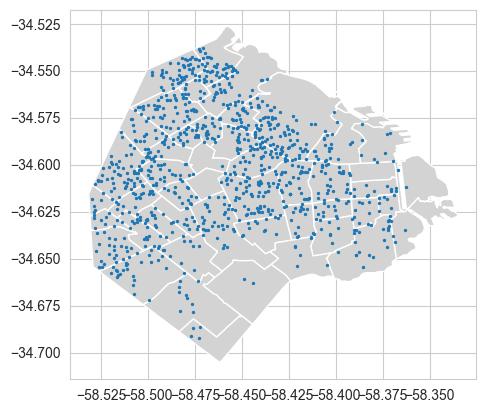

In [17]:
fig, ax = plt.subplots()
geojson["geometry"].plot(ax=ax, color='lightgrey')
clean_df.plot(ax=ax, markersize=2)
plt.show()

In [18]:
dbscan = DBSCAN(eps=0.2, min_samples=5, metric='precomputed')
labels = dbscan.fit_predict(distances)

# Add the cluster labels to the dataframe
clean_df['cluster'] = labels

distances

C:\Users\nunez\PycharmProjects\Permisos_de_obra\venv\lib\site-packages\geopandas\geodataframe.py:1443: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


array([[0.        , 1.55142196, 1.32971337, ..., 5.83837723, 5.62239963,
        5.19429846],
       [1.55142196, 0.        , 0.49216343, ..., 7.18700256, 6.9435304 ,
        6.39925229],
       [1.32971337, 0.49216343, 0.        , ..., 6.75795161, 6.50753687,
        5.94021598],
       ...,
       [5.83837723, 7.18700256, 6.75795161, ..., 0.        , 0.31933137,
        1.23362756],
       [5.62239963, 6.9435304 , 6.50753687, ..., 0.31933137, 0.        ,
        0.91743751],
       [5.19429846, 6.39925229, 5.94021598, ..., 1.23362756, 0.91743751,
        0.        ]])

<Axes: >

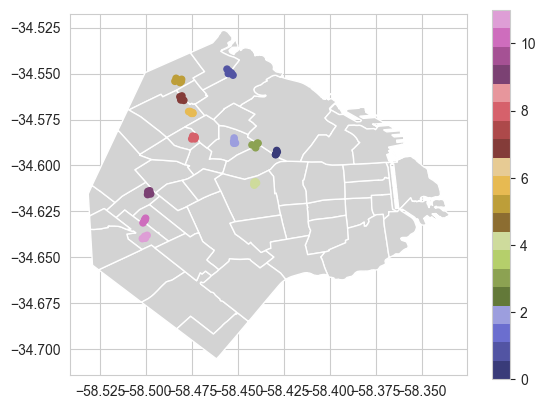

In [19]:
fig, ax = plt.subplots()
geojson["geometry"].plot(ax=ax, color='lightgrey')
clean_df[clean_df["cluster"] != -1].plot(column="cluster", ax=ax, markersize=20, legend=True, cmap='tab20b')

In [20]:
df_clusters = clean_df[clean_df["cluster"] != -1]

In [21]:
df_clusters = df_clusters[['Latitud','Longitud','cluster','SUP_CONST','USO_1']].reset_index(drop=True)
df_clusters['TIPO_OBRA'] = '3'


In [22]:
import folium
m = folium.Map(location=[-34.6, -58.4])
list = ['red', 'darkred', 'green', 'purple', 'white', 'cadetblue', 'darkpurple', 'pink', 'darkgreen', 'gray', 'lightgray', 'blue', 'lightred', 'lightgreen', 'beige', 'black', 'lightblue', 'orange', "darkblue"]

for index, row in df_clusters.iterrows():
    folium.Marker(location=[row["Latitud"], row["Longitud"]],popup=f"Cluster {row['USO_1']}" ,icon=folium.Icon(color=list[row["cluster"]])).add_to(m)


In [23]:
df_clusters_on = pd.read_csv('clusters_obras nuevas.csv')
df_clusters_on

,Unnamed: 0,Latitud,Longitud,cluster,SUP_CONST,USO_1,TIPO_OBRA
0,0,-34.571426,-58.449471,0,2085.73,VIVIENDA MULTIFAMILIAR,1
1,1,-34.571815,-58.447047,0,1563.71,VIVIENDA MULTIFAMILIAR,1
2,2,-34.571910,-58.448831,0,16837.48,VIVIENDA MULTIFAMILIAR,1
3,3,-34.570910,-58.449229,0,1421.67,VIVIENDA MULTIFAMILIAR,1
4,4,-34.570976,-58.447143,0,1736.39,VIVIENDA MULTIFAMILIAR,1
...,...,...,...,...,...,...,...
121,121,-34.641742,-58.508416,15,1572.23,VIVIENDA MULTIFAMILIAR,1
122,122,-34.559586,-58.470672,3,2449.53,SIN DATOS,1
123,123,-34.557394,-58.470673,3,760.83,SIN DATOS,1
124,124,-34.564471,-58.472283,5,818.61,SIN DATOS,1


In [24]:
df_clusters

,Latitud,Longitud,cluster,SUP_CONST,USO_1,TIPO_OBRA
0,-34.594013,-58.429449,0,52.54,SIN DATOS,3
1,-34.591862,-58.428928,0,222.91,VIVIENDA MULTIFAMILIAR,3
2,-34.592704,-58.428615,0,0,VIVIENDA UNIFAMILIAR,3
3,-34.593895,-58.429273,0,0,SIN DATOS,3
4,-34.587936,-58.439070,3,0,VIVIENDA MULTIFAMILIAR,3
...,...,...,...,...,...,...
58,-34.638057,-58.499464,11,0,VIVIENDA MULTIFAMILIAR,3
59,-34.639847,-58.502076,11,301.17,VIVIENDA MULTIFAMILIAR,3
60,-34.639546,-58.500476,11,5943.89,VIVIENDA MULTIFAMILIAR,3
61,-34.638589,-58.500838,11,1619.09,VIVIENDA MULTIFAMILIAR,3


In [27]:
pd.concat([df_clusters_on,df_clusters]).to_excel(r'C:\Users\nunez\OneDrive\Escritorio\Bases\clusters\clusters.xlsx')